# 모듈 설치

In [5]:
!pip install wand

     |████████████████████████████████| 138 kB 7.8 MB/s 


In [6]:
!apt-get install libmagickwand-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev liblqr-1-0
  liblqr-1-0-dev libmagickcore-6-arch-config libmagickcore-6-headers
  libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra libmagickcore-6.q16-dev
  libmagickwand-6-headers libmagickwand-6.q16-3 libmagickwand-6.q16-dev
  libpixman-1-dev librsvg2-dev libwmf-dev libwmf0.2-7 libxcb-shm0-dev
  poppler-data
Suggested packages:
  fonts-noto ghostscript-x libcairo2-doc inkscape libjxr-tools librsvg2-doc
  libwmf-doc libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts

In [7]:
!pip install MagickWand

  Created wheel for MagickWand: filename=magickwand-0.2-py3-none-any.whl size=32460 sha256=cf8e2681e6778459d66a467831b8e5b9bedbc07f1927e71a6a37134f9c6887ad
  Stored in directory: /root/.cache/pip/wheels/34/9d/95/37fe6f87b69b7d1111786f78b9aa6c3eaa6d4553bd6b62407b
Successfully built MagickWand


In [8]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

In [9]:
!apt-get install libmagickwand-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmagickwand-dev is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.11).
0 upgraded, 0 newly installed, 0 to remove and 94 not upgraded.


In [11]:
!pip install flag

# 횡단보도 추출

In [1]:
import cv2

In [2]:
from google.colab.patches import cv2_imshow

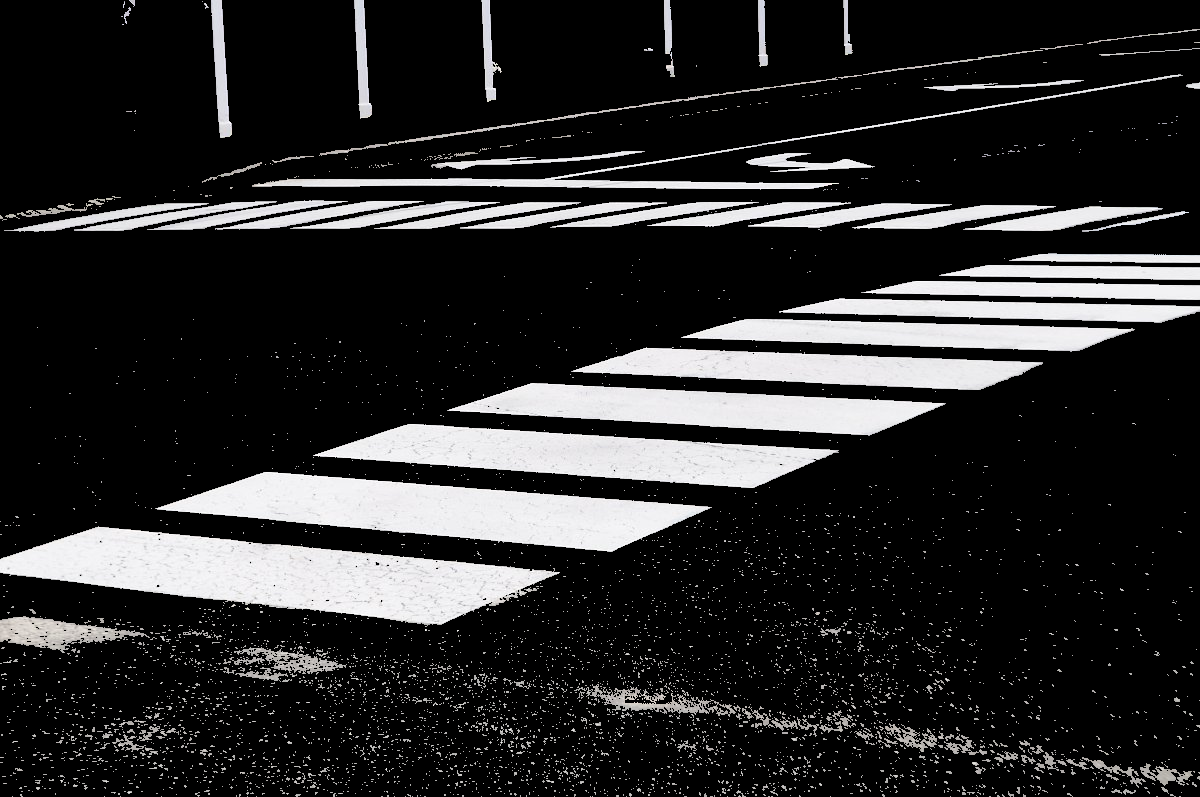

In [3]:
import numpy as np
src = cv2.imread("./2.jpeg", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

width = 400
height = 400


def avgHSV(img_v):
    
    c_img_v = img_v.tolist()
    
    sum = 0
    avg = 0
    
    for i in range(height):
        for j in range(width):
            sum = sum + c_img_v[i][j]
            
    avg = sum / (width*height)
    return avg

avgValue = int(avgHSV(v))
lower_white = np.array([0,0,avgValue+45], dtype=np.uint8)
upper_white = np.array([180,20,255], dtype=np.uint8)

mask = cv2.inRange(hsv,lower_white, upper_white)
crosswalk = cv2.bitwise_and(hsv, hsv, mask = mask)
crosswalk = cv2.cvtColor(crosswalk, cv2.COLOR_HSV2BGR)

# hue의 범위를 조정하여 특정 색상의 범위만 출력가능함
# 배열요소의 범위 설정함수 cv2.inRange로 입력된 배열의 특정 범위 영역만 추출할 수 있음
# cv2.inRange(src, lowerb, upperb)는 입력 이미지(src)의 낮은 범위(lowerb)에서 높은 범위(upperb) 사이의 요소를 추출
# 주황색은 8-20의 범위를 갖고 있어서 8,20 설정함
# 이후, 해당 추출한 영역을 마스크로 사용해서 이미지 위에 덧씌워 해당 부분만 출력
# cv2.bitwise_and(src1, src2, mask)는 입력 이미지1(src1)과 입력 이미지2(src2)의 픽셀의 이진값이 동일한 영역만 AND 연산하여 반환
# 마스크 영역이 존재한다면 마스크 영역만 AND 연산을 진행
# 특정 영역(마스크)의 AND 연산이 완료됐다면 cvtColor로 다시 HSV 색상 공간에서 BGR 색상 공간으로 변경

cv2_imshow(crosswalk)
cv2.waitKey()
cv2.destroyAllWindows()

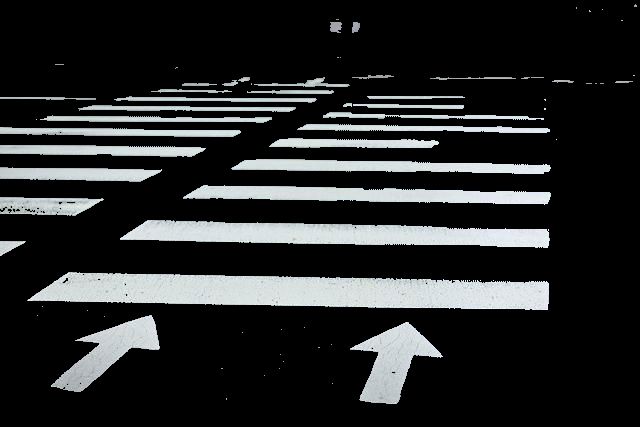

In [4]:
import numpy as np
src = cv2.imread("./1.jpeg", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

width = 400
height = 400


def avgHSV(img_v):
    
    c_img_v = img_v.tolist()
    
    sum = 0
    avg = 0
    
    for i in range(height):
        for j in range(width):
            sum = sum + c_img_v[i][j]
            
    avg = sum / (width*height)
    return avg

avgValue = int(avgHSV(v))
lower_white = np.array([0,0,avgValue+45], dtype=np.uint8)
upper_white = np.array([180,20,255], dtype=np.uint8)

mask = cv2.inRange(hsv,lower_white, upper_white)
crosswalk = cv2.bitwise_and(hsv, hsv, mask = mask)
crosswalk = cv2.cvtColor(crosswalk, cv2.COLOR_HSV2BGR)

# hue의 범위를 조정하여 특정 색상의 범위만 출력가능함
# 배열요소의 범위 설정함수 cv2.inRange로 입력된 배열의 특정 범위 영역만 추출할 수 있음
# cv2.inRange(src, lowerb, upperb)는 입력 이미지(src)의 낮은 범위(lowerb)에서 높은 범위(upperb) 사이의 요소를 추출
# 주황색은 8-20의 범위를 갖고 있어서 8,20 설정함
# 이후, 해당 추출한 영역을 마스크로 사용해서 이미지 위에 덧씌워 해당 부분만 출력
# cv2.bitwise_and(src1, src2, mask)는 입력 이미지1(src1)과 입력 이미지2(src2)의 픽셀의 이진값이 동일한 영역만 AND 연산하여 반환
# 마스크 영역이 존재한다면 마스크 영역만 AND 연산을 진행
# 특정 영역(마스크)의 AND 연산이 완료됐다면 cvtColor로 다시 HSV 색상 공간에서 BGR 색상 공간으로 변경

cv2_imshow(crosswalk)
cv2.waitKey()
cv2.destroyAllWindows()

# 횡단 방향 검출

In [12]:
import cv2
import numpy as np
from wand.image import Image as Img
from PIL import Image
import flag
import os
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import time
import math

def getDirection(degree):
    if degree < 0:
        degree = 90 + degree
        if  0 <= degree < 10:
            return  "12"
        elif 15 <= degree <= 45:
            return "13"
        elif 45 < degree <= 90:
            return "14"
    else:
        degree = 90 - degree
        if  0 <= degree < 10:
            return "12"
        elif 15 <= degree <= 45:
            return "11"
        elif 45 < degree <= 90:
            return  "10"
    


    
def avgHSV(img_v):
    
    c_img_v = img_v.tolist()
    
    sum = 0
    avg = 0
    
    for i in range(height):
        for j in range(width):
            sum = sum + c_img_v[i][j]
            
    avg = sum / (width*height)
            
    return avg
    
   
def order_points(pts):
    coords = np.zeros((4,2), dtype = "float32")
    s= pts.sum(axis = 1)
    
    coords[0] = pts[np.argmin(s)]
    coords[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis = 1)
    
    if(np.argmax(s)==np.argmin(diff)):
        pts[np.argmin(diff)]=0
        diff2 = np.diff(pts, axis = 1)
        coords[1] = pts[np.argmin(diff2)]
    else:
        coords[1] = pts[np.argmin(diff)]
    coords[3] = pts[np.argmax(diff)]
    
    return coords
    

def detect(c,img):
        
        peri = cv2.arcLength(c,True)
        
        approx = cv2.approxPolyDP(c, 0.01*peri, True) # smooth edge
        area = cv2.contourArea(c)
        
        if (len(approx)==4 ) and area >= 1050:            
            cv2.drawContours(img, [approx],  -1, (0, 0, 255), 3)
            temp_approx = approx.reshape(len(approx),2)
            #print(area, approx)
            rect = order_points(temp_approx)
            #if rect[0][0] != 0 and rect[1][0] !=0 and rect[2][0]!=0 and rect[3][0] != 0:
            rectangles.append((area,rect))
        #elif area>260:
            #cv2.drawContours(img, [approx],  -1, (0, 0, 255), 2)
            #print( "Not block" )


def linear_reg(x_data,y_data):
    x_data =np.array(x_data)
    y_data =np.array(y_data)
    gradient, intercept, r_value,p_value,std_err = stats.linregress(x_data,y_data)
    gradient=round(gradient,2)
    intercept=round(intercept,2)
    return gradient,intercept

    
def draw_line(img,gradient,intercept,index):
    if index==1:
        color = (255,0,0)
    elif index==2: 
        color = (0,255,0)
    elif index==3:
        color =(0,0,255)
    height,width,channel = img.shape
    y1=0
    x1=((y1-intercept)/gradient).astype(int)
    y2=height
    x2=((y2-intercept)/gradient).astype(int)
    cv2.line(img,(x1,y1),(x2,y2),color,3)
    return img


In [30]:
def main():
    imgname=os.path.join(dirname,'blockimage.jpg')
    
    img = cv2.imread(target)
    img = cv2.resize(img, (width,height), interpolation=cv2.INTER_AREA)
    blur = cv2.GaussianBlur(img,(3,3),0)
    blurfilename = os.path.join(dirname,'blur.jpg')
    cv2.imwrite(blurfilename,blur)
    frame = cv2.imread(blurfilename)
    

    #hsv
    img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)  

    img_h, img_s, img_v = cv2.split(img_hsv)
    
    avgValue = int(avgHSV(img_v))

    lower_white = np.array([0,0,avgValue+45])
    upper_white = np.array([180,20,255]) 
    
    mask = cv2.inRange(img_hsv, lower_white, upper_white)

    # Bitwise-AND mask and original image  
    img_result = cv2.bitwise_and(frame,frame, mask= mask)
    img_yellow_name = os.path.join(dirname,'img_yellow.jpg')
    cv2.imwrite( img_yellow_name, img_result ) 
            
    img = cv2.imread(img_yellow_name)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #dilation
    kernel = np.ones((6, 6), np.uint8)
    dilation = cv2.dilate(imgray, kernel, iterations=1)
 
    #opening
    kernel = np.ones((7, 7), np.uint8)
    opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN,kernel)

    #Thresholding
    ret, thr = cv2.threshold(opening, 20, 255, 0)
    
    cv2_imshow(thr)

    # _, contours, _ = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    

    contours, _ = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    

    for con in contours:
        detect(con,img)
    
    rectangle_sorted = sorted(rectangles, key=lambda area: area[0], reverse =True)
    
    img_detect_name = os.path.join(dirname,'detectimg.jpg')
    cv2.imwrite(img_detect_name, img)
            
    img1_name = os.path.join(target)
    img2_name = os.path.join(dirname,'detectimg.jpg')
    img_original =cv2.imread(img1_name)
    img_original = cv2.resize(img_original,(width,height) , interpolation=cv2.INTER_AREA)
    img_detect =cv2.imread(img2_name)
    x_list=[]
    y_list=[]
    x2_list=[] 
    y2_list=[]
    for i,rect in enumerate(rectangle_sorted):
        ##rect is composed of size of rectangle(index 0) and 4 coords(index 2)
        for j in range(len(rect[1])):
            cv2.putText(img_detect,str(j),(rect[1][j][0],rect[1][j][1]),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(255,255,255))
        if rect[1][0][0]!=0:
            x_list.append(rect[1][0][0])
            y_list.append(rect[1][0][1])
            x2_list.append(rect[1][2][0])
            y2_list.append(rect[1][2][1])
        else:
            x_list.append(rect[1][0][0])
            y_list.append(rect[1][0][1])
            x2_list.append(rect[1][2][0])
            y2_list.append(rect[1][2][1])
    
        
    if len(x_list) != 0:
        gradient1=0;intercept1=0
        gradient2=0;intercept2=0
        
        gradient1, intercept1 = linear_reg(x_list,y_list)
        gradient2, intercept2 = linear_reg(x2_list,y2_list)
        
        x_intersect = (intercept2-intercept1)/(gradient1-gradient2)
        y_interscet = x_intersect*gradient1+intercept1
        y_mid = 500
        x_mid = y_mid*(gradient1+gradient2)-(intercept1*gradient2) - (gradient1*intercept2)
        x_mid /=2*gradient1*gradient2
        
        x_third = [x_intersect,x_mid]
        y_third = [y_interscet,y_mid]
        gradient3,intercept3 = linear_reg(x_third,y_third)
        
        if not np.isnan(gradient1):
            if not np.isnan(gradient2):
                img_detect = draw_line(img_detect,gradient1,intercept1,1)
                img_detect = draw_line(img_detect,gradient2,intercept2,2)
                img_detect = draw_line(img_detect,gradient3,intercept3,3)
                # print(gradient1,gradient2)
        if not np.isnan(gradient3):
            degree = int(math.degrees(math.atan(gradient3)))
        

        direction_result = "현재 서 있는 위치에서"+getDirection(degree)+"시 방향으로 걸어가세요"
        # os.system(direction_result)
        
        print(direction_result)
        
    
        #if gradient1 >0 and gradient2>0:
            #print("Left side")
            #os.system("mplayer voicefile/left.mp3")
        #elif gradient1 <0 and gradient2>0:
            #print("Center")
            #os.system("mplayer voicefile/front.mp3")
        #elif gradient1 <0 and gradient2<0:
            #print("Right side")
            #os.system("mplayer voicefile/right.mp3")
    else:
        print("NO CROSSWALK")
        # os.system("mplayer voicefile/nodetect.mp3")

    # cv2_imshow(img_original)
    cv2_imshow(img_detect)
    cv2.imwrite('detectimg.jpg',img_detect)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 

In [ ]:
dirname = './'
if not os.path.exists(dirname):
    os.makedirs(dirname)

target = os.path.join(dirname,"1.jpeg")  #white4, white16,  white17, white18, white19

rectangles = [] 
cnt = 0

width = 800
height = 600

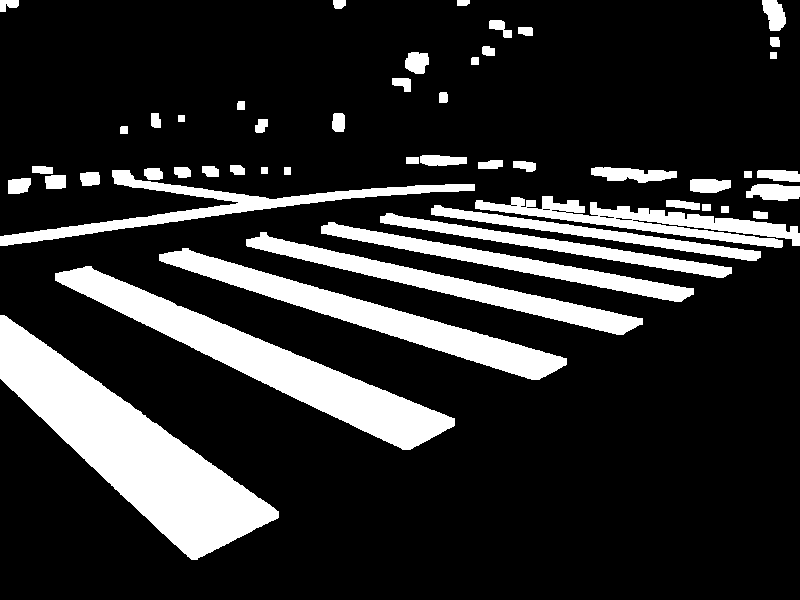

현재 서 있는 위치에서14시 방향으로 걸어가세요


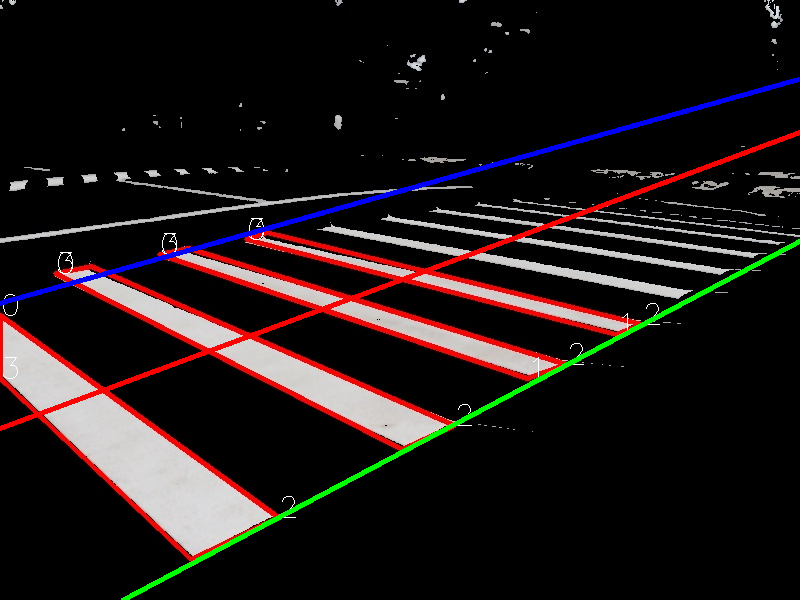

In [31]:
from google.colab.patches import cv2_imshow
main()

In [32]:
dirname = './'
if not os.path.exists(dirname):
    os.makedirs(dirname)

target = os.path.join(dirname,"3.jpeg")  #white4, white16,  white17, white18, white19

rectangles = [] 
cnt = 0

width = 800
height = 600

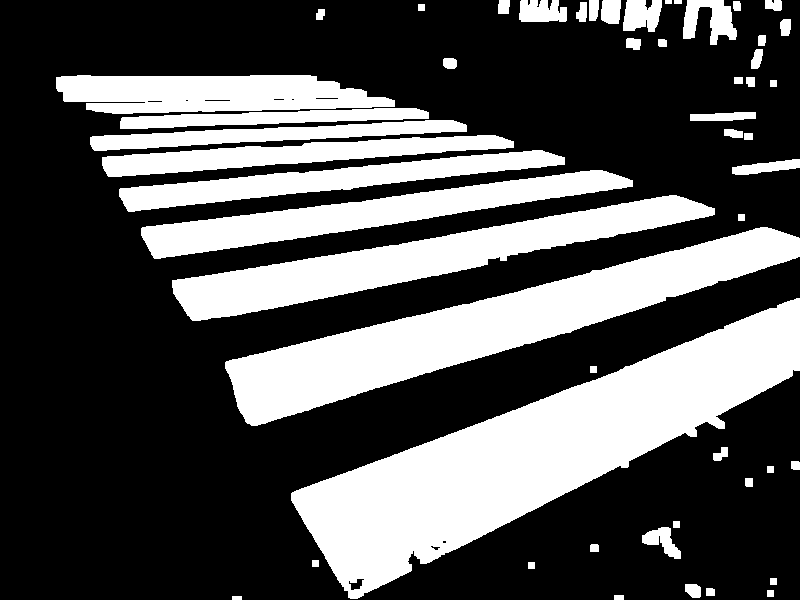

현재 서 있는 위치에서10시 방향으로 걸어가세요


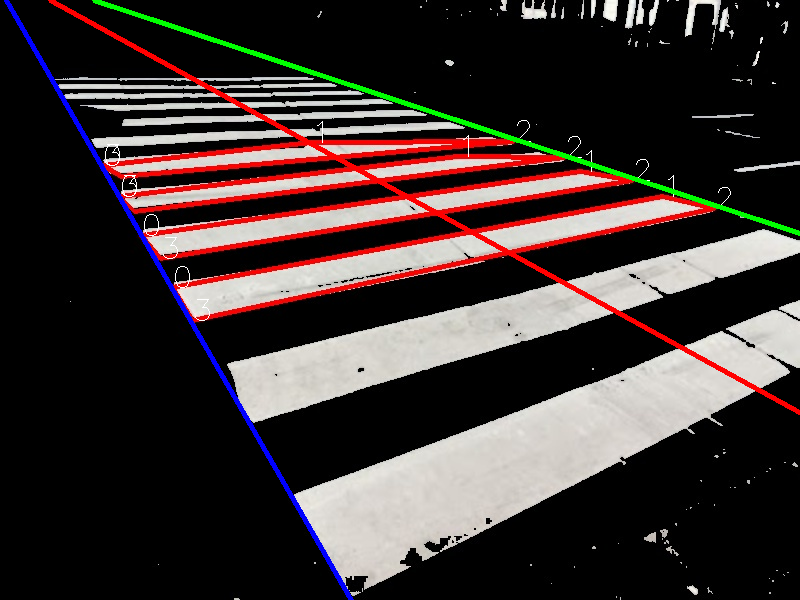

In [33]:
main()

In [34]:
dirname = './'
if not os.path.exists(dirname):
    os.makedirs(dirname)

target = os.path.join(dirname,"6.jpg")  #white4, white16,  white17, white18, white19

rectangles = [] 
cnt = 0

width = 800
height = 600

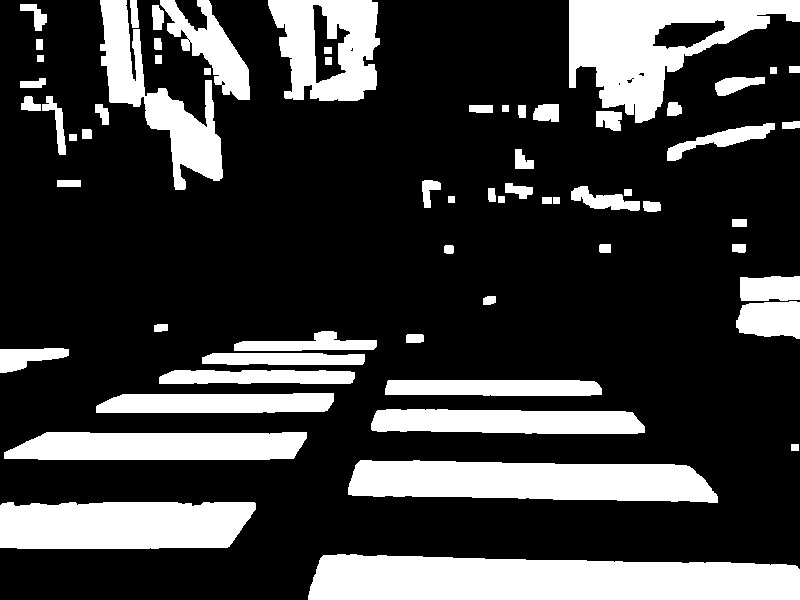

현재 서 있는 위치에서14시 방향으로 걸어가세요


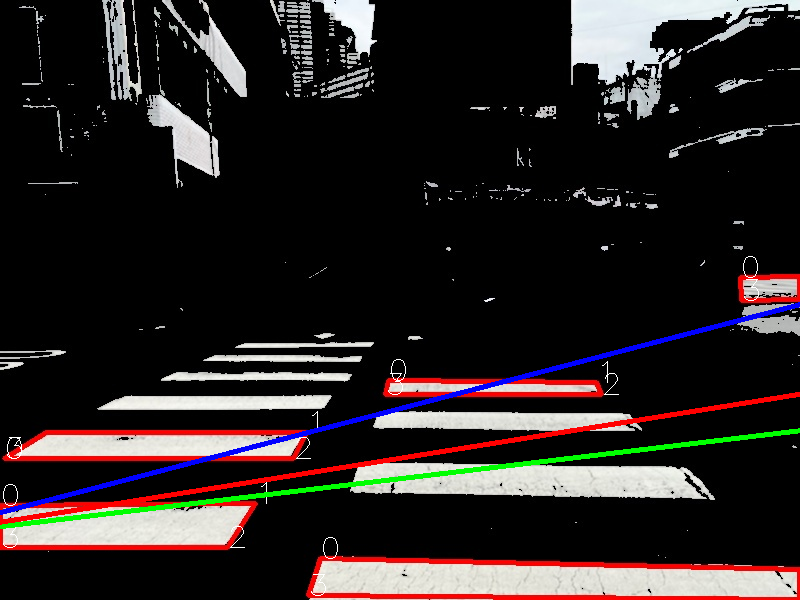

In [35]:
# 멀리에 있는 횡단보도까지 인식해버려서 바로 앞에 있는 횡단보도에 대한 안내가 제대로 되지 않음
main()

In [36]:
dirname = './'
if not os.path.exists(dirname):
    os.makedirs(dirname)

target = os.path.join(dirname,"7.jpg")  #white4, white16,  white17, white18, white19

rectangles = [] 
cnt = 0

width = 800
height = 600

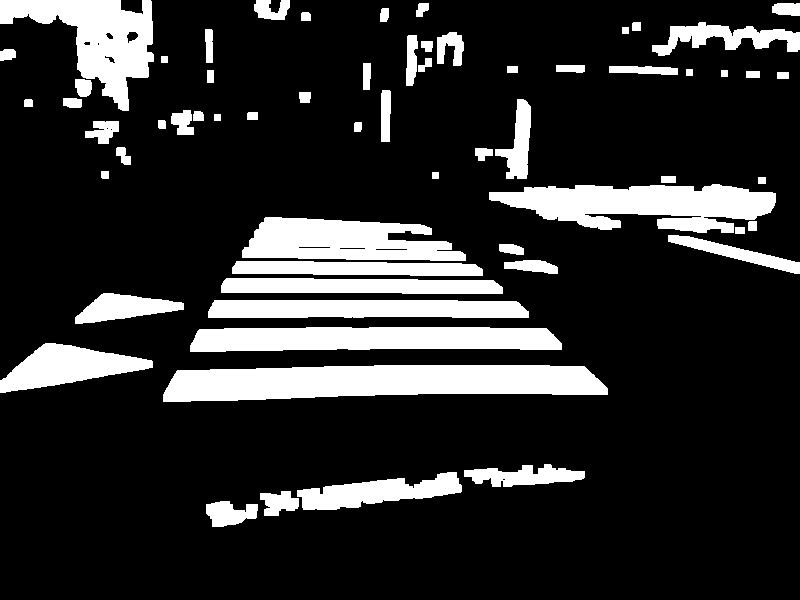

현재 서 있는 위치에서11시 방향으로 걸어가세요


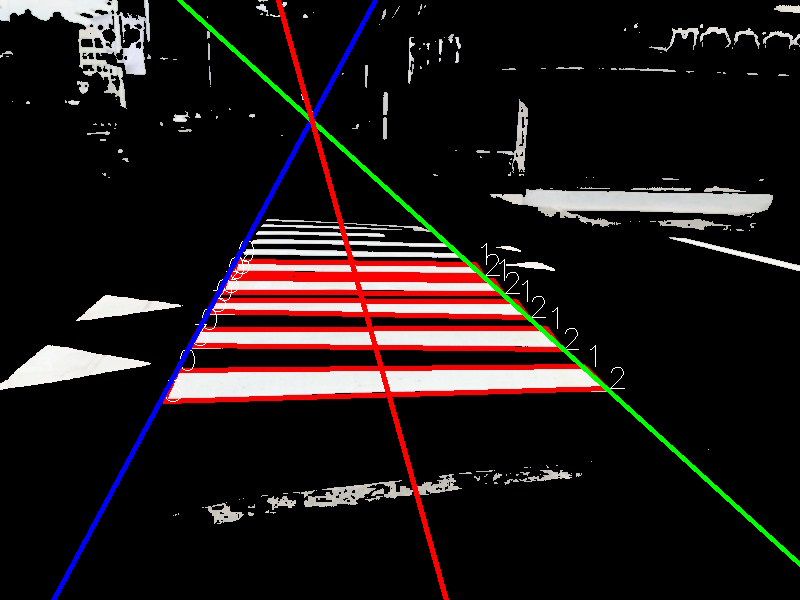

In [37]:
main()

In [38]:
dirname = './'
if not os.path.exists(dirname):
    os.makedirs(dirname)

target = os.path.join(dirname,"8.jpg")  #white4, white16,  white17, white18, white19

rectangles = [] 
cnt = 0

width = 800
height = 600

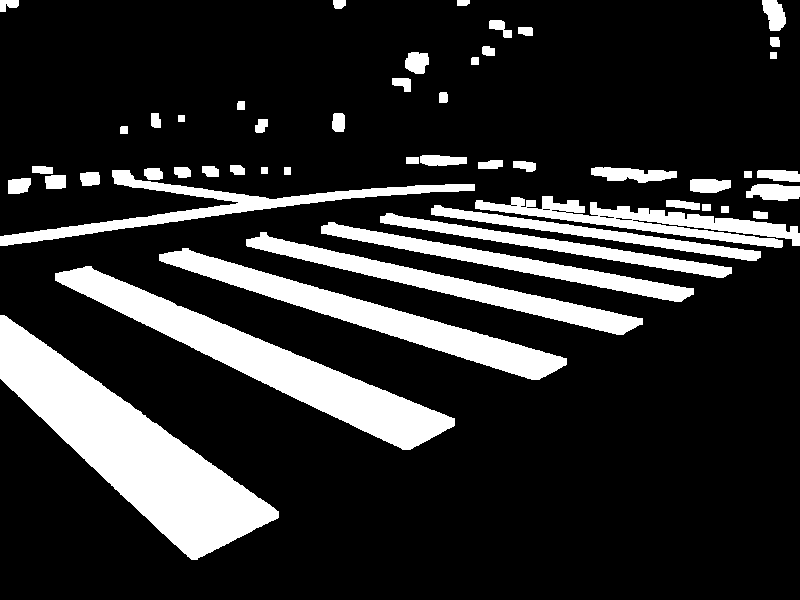

현재 서 있는 위치에서14시 방향으로 걸어가세요


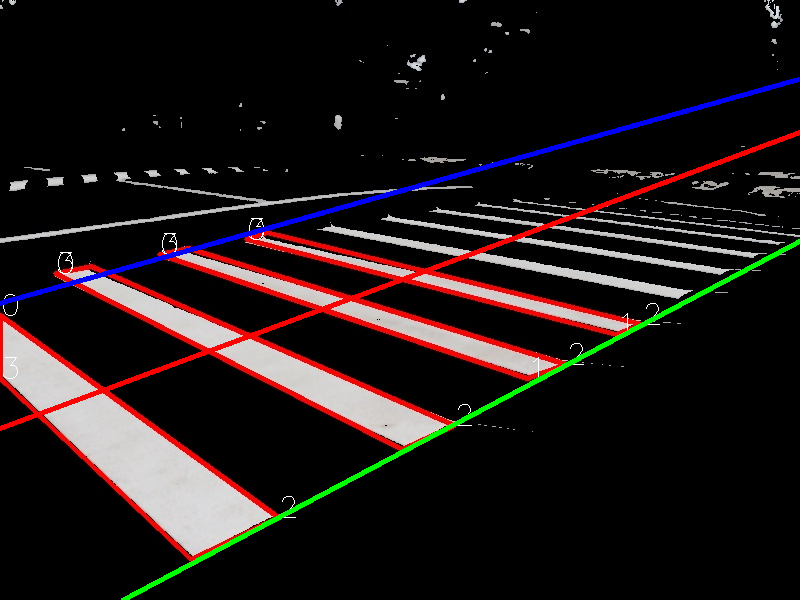

In [39]:
main()